In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train = pd.read_csv('train_s3TEQDk.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [41]:
train.shape

(245725, 11)

In [42]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [44]:
train.duplicated().sum()

0

In [45]:
test = pd.read_csv('test_mSzZ8RL.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [46]:
test.shape

(105312, 10)

In [47]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [48]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [49]:
train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [50]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [51]:
train['Region_Code'] = train['Region_Code'].str.extract('(\d+)')
test['Region_Code'] = test['Region_Code'].str.extract('(\d+)')

In [52]:
train['Channel_Code'] = train['Channel_Code'].str.extract('(\d+)')
test['Channel_Code'] = test['Channel_Code'].str.extract('(\d+)')

In [53]:
train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].value_counts().index[0])
test['Credit_Product'] = test['Credit_Product'].fillna(test['Credit_Product'].value_counts().index[0])

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
x = ['Gender', 'Occupation', 'Credit_Product', 'Is_Active']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [56]:
x = ['Region_Code', 'Channel_Code']
for i in x:
    train[i] = train[i].astype(int)
    test[i] = test[i].astype(int)

In [57]:
newtrain = train.drop('ID', axis = 1)
newtest = test.drop('ID', axis = 1)

In [58]:
newtrain.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,268,1,3,43,0,1045696,0,0
1,0,30,277,2,1,32,0,581988,0,0
2,0,56,268,3,3,26,0,1484315,1,0
3,1,34,270,2,1,19,0,470454,0,0
4,0,30,282,2,1,33,0,886787,0,0


In [59]:
newtest.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,254,1,1,25,1,742366,0
1,1,43,268,1,2,49,0,925537,0
2,1,31,270,2,1,14,0,215949,0
3,1,29,272,1,1,33,0,868070,0
4,0,29,270,1,1,19,0,657087,0


In [74]:
x = newtrain.drop('Is_Lead', axis = 1)
y = newtrain['Is_Lead']

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [76]:
from sklearn.metrics import accuracy_score

In [67]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7935293519177943


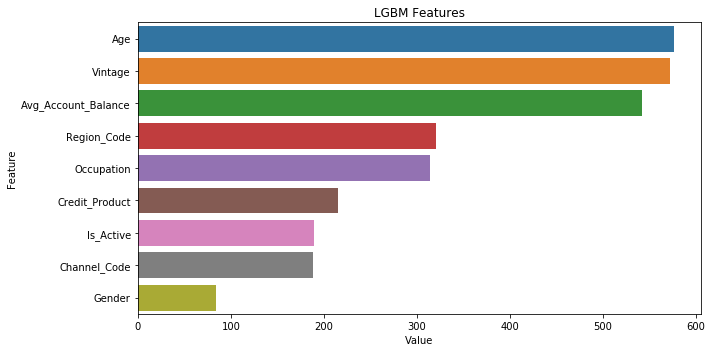

In [68]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [71]:
x_train = newtrain.drop(['Is_Lead', 'Gender'], axis = 1)
y_train = newtrain['Is_Lead']
x_test = newtest.drop('Gender', axis = 1)
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID': test.ID, 'Is_Lead': y_pred})
solution.to_csv('Solution.csv', index = False)